# Introduction to Astronomy (with python)
## Astroparticle Lectures SoSe 2017, prof. Elisa Bernardini 
**Author**:
 * Cosimo Nigro

<figure>
<img src="img/tG26bqw.jpg" alt="Drawing" style="width: 400px;"/>
<figcaption>"Six hours nineteen minutes right ascension, fourteen degrees fifty-eight minutes declination...No sighting."</figcaption>
</figure>


This introduction will provide some notions on astronomy and will play with astronomycal units using the python library astropy.

## Astronomical coordinate systems
The positions of celestial objects is described by sets of spherical polar coordinates projected on the **celestial sphere** (an imaginary sphere of arbitrarily large radius, concentric with Earth). Coordinate systems differ by the choice of the **origin** and the **fundamental plane** of the system (dividing the celestial sphere into two equal hemispheres along a great circle).

### Horizontal coordinate system
<figure>
<img src="img/436px-Azimuth-Altitude_schematic.png" alt="Drawing" style="width: 350px;"/>
<figcaption>Fig 1. - Sketch of horizontal coordinate system.</figcaption>
</figure>

In the horizontal coordinate system **the center of the system is the oberver (observatory)**. The celestial sphere is divided in two hemispheres: an upper hemisphere - where objects are visible, and a lower hemisphere - where Earth obstructs vision. The great circle separating the hemispheres is called the **celestial horizon**.    
The angular coordinates are:
* **Altitude (Alt)** (or elevation) is the angle between the object and the observer's local horizon. For visible objects it is an angle between 0 degrees and 90 degrees. Alternatively, zenith distance (**Zd**) may be used, it is the complement to 90° of altitude (meaning that the sum of the altitude and the zenith distance is 90°);
* **Azimuth (Az)** is the angle of the object around the horizon, usually measured from the north increasing towards the east. 

### Equatorial coordinate system
<figure>
<img src="img/precession_static_m.gif" alt="Drawing" style="width: 350px;"/>
<figcaption>Fig 2. - Sketch of equatorial coordinate system.</figcaption>
</figure>

In the equatorial coordinate system **the center of the system is the Earth**. 
The rotational axis of the Earth defines two points in the celestial sphere: the north and south celestial pole (**NCP**, **SCP**). The fundamental plane of this system is the plane perpendicular to the rotational axis. The circle that this plane cuts in the celstial sphere is called **celestial equator**.
The angular coordinates we can define are:    
* **Declination, $\delta$ (DEC)** is the polar angle measured from the equator ($\delta =  0^{\circ}$), the NCP has declination $\delta =  +90^{\circ}$, the SCP has declination $\delta =  -90^{\circ}$.
* **Right Ascension, $\alpha$ (RA)**: the zero point of RA is taken to be be the point at which the celestial equator intersects the plane of the **ecliptic** (plane of the orbital motion of the Earth). This point is known as the **First Point in Aries**, or the Vernal equinox, and is defined to be *0 hours* of right ascension. Lines of constant longitude around the celestial equator are defined in terms of hours, minutes and seconds of time, such that 24 hours corresponds to completing a great circle of $360^{\circ}$.   


For this coordinate system - better than a picture - I have aslo an [interactive demonstrator](http://astro.unl.edu/classaction/animations/coordsmotion/radecdemo.html)

*small note: an updating coordinate system)*: In the year 2000.0, the Earth’s rotation axis was tilted at an angle of $23^{\circ}\,26'\,21.448''$ with respect to the direction perpendicular to the plane of the ecliptic. The coordinates of right ascension and declination are referred to the **reference epoch 2000.0** which is known as the 2000.0 coordinate system.

### Galactic Coordinate system
<figure>
<img src="img/page1_1.jpg" alt="Drawing" style="width: 400px;"/>
<figcaption>Fig 3. - Sketch of galactic coordinate system.</figcaption>
</figure>

In this coordinate system the Sun is chosen as center and **the fundamental plane is the Galactic plane**. The **Galactic equator** is taken to be the great circle which passes through the centre of the Galactic plane as illustrated in Fig 3. In our spiral galaxy a disc of stars and gas rotates about the **Galactic Centre**, in which a very compact radio source **Sagittarius A* ** - nowaday identified as a supermassive black hole (SMBH) - resides.
The coordinates we define are:    
* **Galactic longitude (l)** is defined as increasesing in a counter-clockwise direction starting at $l = 0^{\circ}$ at the Galactic Centre, reaches $180^{\circ}$ in the anti-Centre direction and returns to zero after completing a circuit of $360^{\circ}$. The **Galactic north pole** is defined to be the pole of the Galactic coordinate system which lies in the northern celestial hemisphere.
* **Galactic latitude (b)** is defined such that the Galactic equator is at $b = 0^{\circ}$ and the Galactic north pole at $b = +90^{\circ}$ ; the Galactic south pole lies at $b = -90^{\circ}$. The inclination of the Galactic equator to the Earth’s equator is 62.9 degrees.

### Exercise 1
Search (you can use books or internet) for the formula to convert from Galactic to Equatorial coordinates.    
* Give the refernece you are using. 
* Give a brief justification of the formula. (If you derive the formula yourself you will receive a bonus).
* Calculate RA and DEC for the Galactic center.

### Example 1: transformations of coordinates
You can check the result with ```astropy```, a fantastic open-source python based tool for astronomy (http://docs.astropy.org/en/stable/)      
Astropy has a class called ```coordinates``` (http://docs.astropy.org/en/stable/coordinates/)      
You can also check the values in **Appendix A** of Longair *High Energy Astrophysics*    

In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
gal_cent_lonlat = SkyCoord(l=0*u.degree, b=0*u.degree, frame='galactic')
# icrs system is the International Astronomical Unit standardization of the equatorial system
# coordiantes are roughly the same https://en.wikipedia.org/wiki/International_Celestial_Reference_System
gal_cen_radec = gal_cent_lonlat.transform_to('icrs') 
print gal_cen_radec

<SkyCoord (ICRS): (ra, dec) in deg
    ( 266.40498829, -28.93617776)>


In [2]:
# we want RA in hour, minute and seconds, we use then astropy units
ra_hms = gal_cen_radec.ra.hms
print ra_hms.h, 'h ', ra_hms.m, 'm ', ra_hms.s, 's'

17.0 h  45.0 m  37.1971887707 s


In [3]:
# we are fine with DEC in degrees
gal_cen_radec.dec

<Latitude -28.93617776179147 deg>

### Example 2: positions of source in different coordinate systems
We will see how a bunch of sources distributed along the galactic planes appears in both coordinate systems.   
We will consider few **Supernova Remnants** (SNR). SNRs are the vestiges of dead - very massive - stars (more details in the course). 

In [4]:
# first four lines of the files are descriptive
lines = [line[:-1] for line in file('data/small_cat_SNR.txt').readlines()]

# how do we split the files and retrieve useful information?
# split the string containg the line each time a double space is met, retain only non empty strings
words = [word for word in lines[4].split('  ') if word] # 'if word' meaning if it's not an empty stringg
print words

# initialize empty lists
src_lon = []
src_lat = []
src_name = []

['18.8', '+0.3', 'Kes 67']


In [5]:
# loop through all the lines, store glon, glat, RA, DEC and source name
for line in lines:
    # split the string containg the line each time a double space is met, retain only non empty strings
    words = [word for word in line.split('  ') if word] # 'if word' meaning if it's not an empty string
    src_lon.append(float(words[0]))
    src_lat.append(float(words[1]))
    src_name.append(words[2])
    
n_src = len(src_name) 

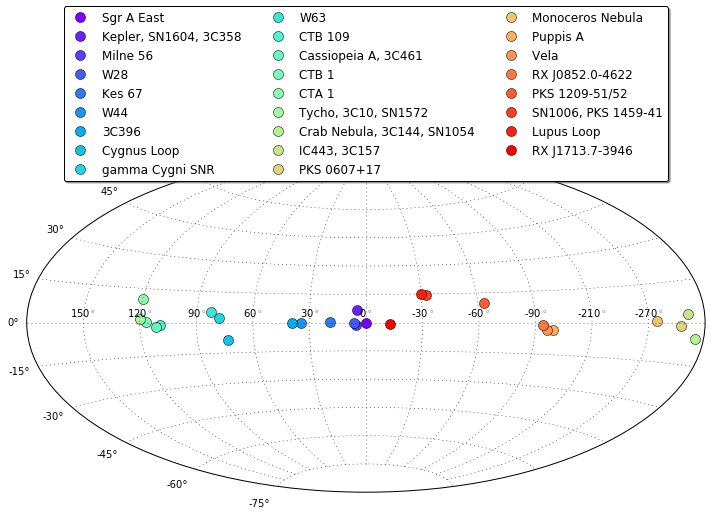

In [6]:
# now we plot them
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

fig = plt.figure(figsize=(10, 6))
font = {'family': 'serif',  'color':'black', 'weight': 'normal', 'size': 16.} # font definitions
ax = fig.add_subplot(111, projection="aitoff")

src_coord = SkyCoord(l = src_lon*u.degree, b = src_lat*u.degree, frame="galactic")

lon_src, lat_src = src_coord.l, src_coord.b
lon_src = -lon_src.wrap_at(180*u.degree) # now flip it and fold it so that it looks normal

color=iter(cm.rainbow(np.linspace(0,1,n_src)))

for name, lon, lat in zip(src_name, lon_src, lat_src):
    ax.plot(lon.radian, lat.radian, label = name, marker = 'o', markersize=10, ls='', color=next(color))

ax.grid(True)
ax.set_xticklabels(['150$^\circ$','120$^\circ$','90$^\circ$','60$^\circ$','30$^\circ$','0$^\circ$',
                    '-30$^\circ$','-60$^\circ$','-90$^\circ$','-210$^\circ$','-270$^\circ$'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), numpoints=1, ncol=3, fancybox=True, shadow=True)
fig.tight_layout()
plt.show()

In [7]:
# transform in equatorial coordinates now
src_coord = src_coord.transform_to('icrs')
print src_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [( 266.40498829, -28.93617776), ( 262.67813311, -21.51624205),
     ( 270.63418673, -24.88824693), ( 270.12858885, -23.47505096),
     ( 276.03868842, -12.40994737), ( 284.02195841,   1.39102196),
     ( 285.99454755,   5.43868399), ( 312.70472571,  30.72122494),
     ( 305.34420802,  40.43149768), ( 304.80919195,  45.53211707),
     ( 345.31022676,  58.88034772), ( 350.76768139,  58.83125475),
     ( 359.72541676,  62.45488014), (   1.38975505,  72.76533298),
     (   6.36011091,  64.1287065 ), (  83.64326539,  21.97037544),
     (  94.30481917,  22.51812644), (  92.35858332,  17.30801946),
     (  99.90290804,   6.83976419), ( 125.5856208 , -42.97829617),
     ( 128.54542854, -45.76136518), ( 132.96751736, -46.27513523),
     ( 182.45412869, -52.35119263), ( 225.71683241, -41.89081131),
     ( 228.08304234, -40.35212292), ( 258.39168554, -39.80479244)]>


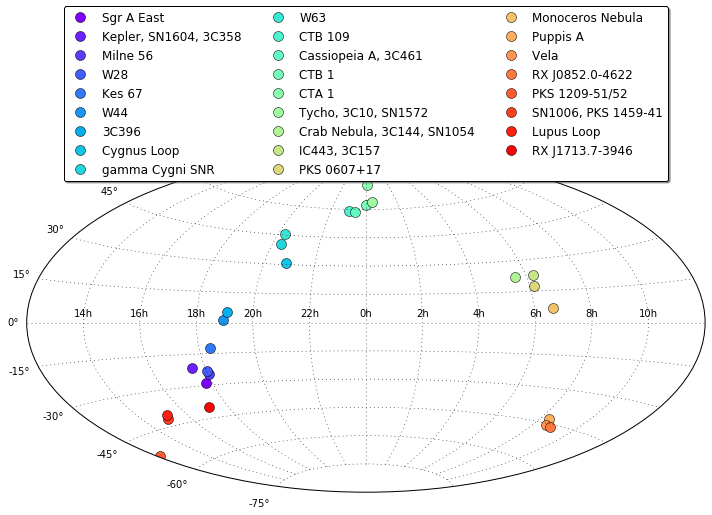

In [9]:
fig2 = plt.figure(figsize=(10, 6))
ax2 = fig2.add_subplot(111, projection="aitoff")

ra_src, dec_src = src_coord.ra, src_coord.dec
ra_src = ra_src.wrap_at(180*u.degree) # same reason as before

color=iter(cm.rainbow(np.linspace(0,1,n_src)))

for name, ra, dec in zip(src_name, ra_src, dec_src):
    ax2.plot(ra.radian, dec.radian, label = name, marker = 'o', markersize=10, ls='', color=next(color))

ax2.grid()
ax2.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), numpoints=1, ncol=3, fancybox=True, shadow=True)
fig2.tight_layout()
plt.show()

### Digression: Why do we see Supernova on the Galactic plane?
**Or: extended vs point sources**     
Wanna see some beauties? For your eyes only.   
<figure>
<img src="img/600px-SN_1006.jpg" alt="Drawing" style="width: 300px;"/>
<figcaption>SN1006</figcaption>
</figure>
<figure>
<img src="img/600px-Tycho-supernova-xray.jpg" alt="Drawing" style="width: 300px;"/>
<figcaption>Tycho</figcaption>
</figure>
<figure>
<img src="img/750px-Keplers_supernova.jpg" alt="Drawing" style="width: 300px;"/>
<figcaption>Kepler SNR</figcaption>
</figure>
<figure>
<img src="img/Crab_Nebula.jpg" alt="Drawing" style="width: 300px;"/>
<figcaption>The Crab</figcaption>
</figure>
<figure>
<img src="img/788px-Cassiopeia_A_Spitzer_Crop.jpg" alt="Drawing" style="width: 300px;"/>
<figcaption>Cassiopeia, queen of Ethiopia, mother of Andromeda</figcaption>
</figure>
<figure>
<img src="img/SuperNova-PuppisA-XRay-20140910.jpg" alt="Drawing" style="width: 300px;"/>
<figcaption>Puppis A</figcaption>
</figure>

   
When a massive star collapse it sweeps out most of its constituent material. The ejecta extends up to few $pc$ around the star position. SNR occurs everywhere in the universe, but the remnants of Galactic objects, when observed through telescopes at different wavebands, are most of the times seen as **extended sources**.          
The definition of **extended** or **point** source is given by the **Point Spread Function** (PSF) of the instrument.   
The PSF describes the response of an imaging system to a point object. It is an indication of the spread of a geometrical point produced by the limited resolution of your system.    
If $\theta_{\rm source}$ is the angular dimension of the source, we can establish the following **simplified$\dagger$** convention:    

\begin{cases}
    {\rm point\;source} & \text{if $\theta_{\rm source} \leq$ PSF} \\
    {\rm extended\;source} & \text{if $\theta_{\rm source} >$ PSF} 
\end{cases}

**$\dagger$**I wrote **simplified** because, technically, the observed radial dimension of the source is given by the convolution of its real radial extension with the PSF (which is a function, not a simple scalar value). Less technically here (and in the following exercise) we will interpret the PSF as a simple value for the **angular resolution** of the system, and we will use interchangeably the two words.

### Exercise 2
M87 is a galaxy with $\sim 4\,arcmin$ extension (infrared survey information) in the sky, residing at $54 \times 10^6\,l.y.$. Keep in mind arcs are measured in radians.
* Calculate the extension of the source in $pc$
* Is the source extended if observed with radio telescopes? Very Long Baseline Interferometry provides angular resolution of few $mas$ [milli-arcsecond].      
* Is the source extended if observed with the Fermi satellite in $\gamma$-rays? The PSF of Fermi is $\sim0.1^{\circ}$

### Example 2: Plan an observation, with astropy
Now we put together what we have learnt about coordinate systems. Suppose we want to observe M87 from Berlin.

In [39]:
# we need few more libraries from astropy
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

# We can retrieve the corrds of the object by its name using SkyCoord
M87 = SkyCoord.from_name('M87') 
print M87

<SkyCoord (ICRS): (ra, dec) in deg
    ( 187.7059304,  12.3911231)>


In [42]:
# define Berlin Location
Berlin = EarthLocation(lat=52.52*u.deg, lon=13.41*u.deg, height=34*u.m)
# In summer, Berlin is 2 hours offset wrt the Coordinated Universal Time
# https://en.wikipedia.org/wiki/Coordinated_Universal_Time 
# our time zone is defined as Central European Summer Time (CEST)
utcoffset = +2*u.hour 
time = Time('2017-6-13 23:00:00') - utcoffset
# M87 coordinates in Berlin Horizontal Coordinate System
M87_altaz = M87.transform_to(AltAz(obstime=time,location=Berlin))  
"M87's Altitude = {0.alt:.2}".format(M87_altaz)  

"M87's Altitude = 3.7e+01 deg"

We have calculated the coordinates of M87 in Altitude and Azimuth, using a Horizontal Coorinate system defined on Berlin.    
The source is at $37^{\circ}$ over the horizon at 23:00 It will be covered by buildings maybe. Let's go to Tempelhof and see how it goes during the rest of the night.

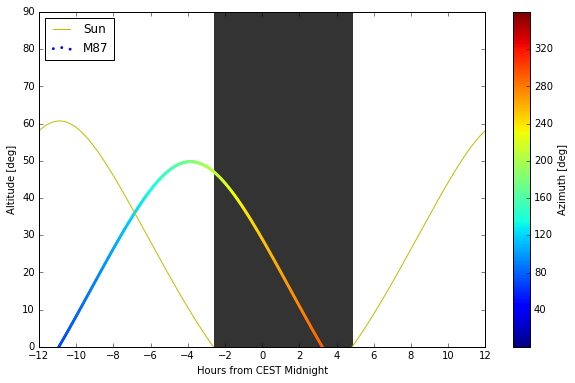

In [45]:
from astropy.coordinates import get_sun
midnight = Time('2017-6-14 00:00:00') - utcoffset
# create an array of times from 12h before to 12 after midnight
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times = midnight + delta_midnight
# Berlin Horizontal Coordinate system
altazframe = AltAz(obstime=times, location=Berlin)
# Sun's position in it
sunaltazs = get_sun(times).transform_to(altazframe)
M87_altazs = M87.transform_to(altazframe)  

fig3 = plt.figure(figsize=(10, 6))
plt.plot(delta_midnight, sunaltazs.alt, color='y', label='Sun')  
# plot accounting fro the Azimuth
plt.scatter(delta_midnight, M87_altazs.alt, c=M87_altazs.az, label='M87', lw=0, s=8)  
# plot a gray band corresponding to dark time i.e. negative altitude of the sun
plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunaltazs.alt < 0*u.deg, color='0.2', zorder=0)  
plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(-12, 12)  
plt.xticks(np.arange(13)*2 -12)  
plt.ylim(0, 90)  
plt.xlabel('Hours from CEST Midnight')  
plt.ylabel('Altitude [deg]')  
plt.show()